In [1]:
#
# Carga del dataset
#
import pandas as pd

dataframe = pd.read_csv(
    "sentences.csv.zip",
    index_col=False,
    compression="zip",
)

In [2]:
#
# Exploración de los datos
#
dataframe.shape

(2264, 2)

In [3]:
# Data
#
dataframe.head()

,phrase,target
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [4]:
#
# Sentimientos (clases)
#

dataframe.target.value_counts()

target
neutral     1391
positive     570
negative     303
Name: count, dtype: int64

In [5]:
# 
# Ejemplos de frases positivas
#

for i in range(5):
    print(dataframe[dataframe.target == "positive"]["phrase"].iloc[i])
    

For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m 
In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn 
Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales 
Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales 
Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn 


In [6]:
#
# Ejemplos de frases negativas
#
for i in range(5):
    print(dataframe[dataframe.target == "negative"]["phrase"].iloc[i])

Jan. 6 -- Ford is struggling in the face of slowing truck and SUV sales and a surfeit of up-to-date , gotta-have cars 
Pharmaceuticals group Orion Corp reported a fall in its third-quarter earnings that were hit by larger expenditures on R&D and marketing 
However , the growth margin slowed down due to the financial crisis 
2009 3 February 2010 - Finland-based steel maker Rautaruukki Oyj ( HEL : RTRKS ) , or Ruukki , said today it slipped to a larger-than-expected pretax loss of EUR46m in the fourth quarter of 2009 from a year-earlier profit of EUR45m 
( ADPnews ) - Feb 3 , 2010 - Finland-based steel maker Rautaruukki Oyj ( HEL : RTRKS ) , or Ruukki , said today it slipped to a larger-than-expected pretax loss of EUR 46 million ( USD 64.5 m ) in the fourth quarter of 2009 from 


In [7]:
#
# Ejemplos de frases neutras
#
for i in range(5):
    print(dataframe[dataframe.target == "neutral"]["phrase"].iloc[i])


According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing 
At the request of Finnish media company Alma Media 's newspapers , research manager Jari Kaivo-oja at the Finland Futures Research Centre at the Turku School of Economics has drawn up a future scenario for Finland 's national economy by using a model developed by the University of Denver 
STOCK EXCHANGE ANNOUNCEMENT 20 July 2006 1 ( 1 ) BASWARE SHARE SUBSCRIPTIONS WITH WARRANTS AND INCREASE IN SHARE CAPITAL A total of 119 850 shares have been subscribed with BasWare Warrant Program 
A maximum of 666,104 new shares can further be subscribed for by exercising B options under the 2004 stock option plan 
Tiimari operates 194 stores in six countries -- including its core Finnish market -- and generated a turnover of 76.5 mln eur in 2005 


In [8]:
#
# Particionamiento de datos
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataframe.phrase,
    dataframe.target,
    test_size=0.3,
    shuffle=False,
)

In [9]:
#
# Preprocesamiento de texto
#
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    lowercase=True,
    analyzer="word",
    token_pattern=r"\b[a-zA-Z]\w+\b",
    stop_words="english",
    max_df=0.99,
    min_df=2,
    binary=True,
)
vectorizer.fit(X_train)

CountVectorizer(binary=True, max_df=0.99, min_df=2, stop_words='english',
                token_pattern='\\b[a-zA-Z]\\w+\\b')

In [10]:
#
# Columnas de la matriz documento-termino
#
vectorizer.get_feature_names_out()

array(['ab', 'able', 'abp', ..., 'years', 'yesterday', 'yit'],
      dtype=object)

In [11]:
#
# Especificación del modelo
#
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf

LogisticRegression(max_iter=1000)

In [12]:
#
# Entrenamiento del modelo
#

X_train_vectorized = vectorizer.transform(X_train)
clf.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [13]:
#
# Evaluación de la precisión del modo
#
from sklearn.metrics import accuracy_score
#
# Muestra de entrenamiento
#
accuracy_score(
    y_true=y_train,
    y_pred=clf.predict(X_train_vectorized),
)

0.9924242424242424

In [14]:
#
# Muestra de prueba
#
X_test_vectorized = vectorizer.transform(X_test)
predictions = clf.predict(X_test_vectorized)

accuracy_score(
    y_true=y_test,
    y_pred=predictions,
)

0.5338235294117647

Confusion matrix:
[[  2  78 189]
 [  0 344  39]
 [  0  11  17]]


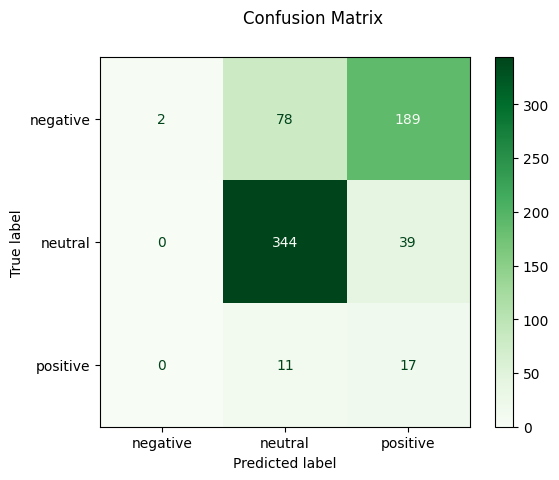

In [16]:
#
# Matriz de confusión
#
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [15]:
#
# Almacenamiento del modelo
#
import pickle

with open("clf.pickle", "wb") as file:
    pickle.dump(clf, file)

with open("vectorizer.pickle", "wb") as file:
    pickle.dump(vectorizer, file)

In [17]:
#
# Uso del modelo
#
with open("clf.pickle", "rb") as file:
    new_clf = pickle.load(file)

with open("vectorizer.pickle", "rb") as file:
    new_vectorizer = pickle.load(file)

accuracy_score(
    y_true=dataframe.target,
    y_pred=new_clf.predict(new_vectorizer.transform(dataframe.phrase)),
)

0.8546819787985865